In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import sklearn

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure',figsize=(12, 6))

In [8]:
df = pd.read_csv('data.csv')

df['IPO_DATE'] = pd.to_datetime(df['IPO_DATE'], format = '%Y/%m/%d',errors = 'coerce')
df = df.sort_values(by = 'PE_TTM')
df.dropna().reset_index(drop = True).sort_values('IPO_DATE')

,WindCodes,IPO_DATE,PCT_CHG,SWING,PCT_CHG_PER,SWING_PER,EV3,PE_TTM,PB_MRQ_GSD,WGSD_EPS_BASIC,...,WGSD_SALES_OPER,WGSD_NET_INC,WGSD_OPER_CF,WGSD_ASSETS,WGSD_GROWTH_SALES_1Y,WGSD_GROWTH_OP_1Y,WGSD_GROWTH_ASSET_1Y,WGSD_GROWTH_DEBT_1Y,WGSD_GROWTH_EPS_1Y,SEC_ENGLISHNAME
22,GE.N,1899-12-31,21.015110,37.274363,0.000000,9.800919,1.150000e+11,-30.170803,3.414308,0.580,...,7.961900e+10,5.704000e+09,3.597000e+09,2.530000e+11,-16.378894,-84.913033,-4.734484,-8.386998,-193.548387,GENERAL ELECTRIC
171,IBM.N,1916-05-08,17.120852,27.552282,5.303705,8.922900,1.290000e+11,23.940422,6.010569,6.280,...,7.362000e+10,5.590000e+09,1.819700e+10,1.560000e+11,-4.571792,-37.729937,2.487088,3.080746,-40.921919,IBM
246,KO.N,1919-09-15,0.483002,14.308738,0.886099,4.015138,2.360000e+11,32.649765,11.576190,1.800,...,3.301400e+10,7.747000e+09,9.844000e+09,8.729600e+10,-11.409864,-6.581942,1.059261,1.116677,-13.875598,COCA COLA
200,PEP.O,1919-12-18,0.071217,13.891897,1.043168,4.299636,2.030000e+11,27.136816,14.585041,5.140,...,7.037200e+10,7.120000e+09,1.061300e+10,9.291800e+10,4.781049,-2.050335,18.296052,24.634495,-1.720841,PEPSICO
36,XOM.N,1920-03-25,47.285220,58.484227,7.971025,17.580033,2.490000e+11,-13.041960,1.586896,-5.250,...,1.800000e+11,-2.244000e+10,1.466800e+10,3.330000e+11,-30.923593,-252.227165,-8.231453,3.031303,-256.250000,EXXON MOBIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,FOXA.O,2019-03-13,28.617805,56.953133,-1.455026,8.558201,2.133160e+10,10.704672,1.950432,1.630,...,1.230300e+10,9.990000e+08,2.365000e+09,2.175000e+10,21.176007,10.097002,65.764805,248.523985,-53.693182,FOX-A
190,DOW.N,2019-03-20,24.357779,37.555387,9.250960,17.493598,5.098950e+10,25.948854,3.641327,1.640,...,3.854200e+10,1.225000e+09,6.226000e+09,6.147000e+10,-10.265186,-27.386364,1.563016,4.382942,-189.130435,DOW
243,CTVA.N,2019-05-24,14.629524,35.081755,-5.755229,12.271659,3.252827e+10,32.238125,1.325628,0.910,...,1.421700e+10,6.810000e+08,2.064000e+09,4.264900e+10,2.679474,40.331492,0.594382,-1.434817,-171.093750,CORTEVA
147,AMCR.N,2019-06-11,2.928188,20.860342,1.096121,9.865093,1.848610e+10,21.450565,3.978071,0.382,...,1.246750e+10,6.122000e+08,1.384200e+09,1.644210e+10,33.784378,-1.304302,81.530224,40.574736,-23.600000,AMCOR


In [76]:
df = df.query('PE_TTM < 200 & PE_TTM > -200')
data = df.iloc[:,2:-1]
mean = data.mean()
std = data.std()
mean_dic = mean.to_dict()
std_dic = std.to_dict()

In [77]:
S_P = pd.concat([df.iloc[:,-1],df.iloc[:,1], (data - mean) / std], axis = 1)
S_P = S_P.dropna().reset_index(drop = True)
S_P = S_P[['PE_TTM','EV3','WGSD_GROWTH_OP_1Y',
     'WGSD_DEBTTOASSETS','WGSD_ASSETS','WGSD_GROWTH_EPS_1Y','WGSD_NETPROFITMARGIN']]
S_P

,PE_TTM,EV3,WGSD_GROWTH_OP_1Y,WGSD_DEBTTOASSETS,WGSD_ASSETS,WGSD_GROWTH_EPS_1Y,WGSD_NETPROFITMARGIN
0,-5.432959,-0.192678,-0.152856,1.105111,-0.233237,-0.036367,-0.264143
1,-5.238875,-0.268225,-0.117705,-0.597763,-0.176698,-3.203964,-2.748271
2,-4.851217,-0.170671,-0.181109,1.245838,-0.225617,-0.054495,-0.359355
3,-3.906527,-0.242168,-0.300132,-0.196867,-0.126084,-0.073502,-0.332725
4,-3.168203,0.692128,-0.044858,-0.043558,1.616518,-0.063408,-0.349578
...,...,...,...,...,...,...,...
377,3.037382,0.085580,-0.195688,0.423663,-0.236010,-0.043297,-0.249186
378,3.121054,-0.301809,-0.052271,0.313200,-0.306841,-0.004803,0.276029
379,3.751682,-0.067120,-0.031138,-0.254165,-0.217139,-0.009399,-0.077109
380,4.328319,-0.225449,-0.048302,-0.572582,-0.266592,-0.004335,-0.042822


In [78]:
y = S_P['PE_TTM']

X = S_P.drop(['PE_TTM'], axis = 1)
X

,EV3,WGSD_GROWTH_OP_1Y,WGSD_DEBTTOASSETS,WGSD_ASSETS,WGSD_GROWTH_EPS_1Y,WGSD_NETPROFITMARGIN
0,-0.192678,-0.152856,1.105111,-0.233237,-0.036367,-0.264143
1,-0.268225,-0.117705,-0.597763,-0.176698,-3.203964,-2.748271
2,-0.170671,-0.181109,1.245838,-0.225617,-0.054495,-0.359355
3,-0.242168,-0.300132,-0.196867,-0.126084,-0.073502,-0.332725
4,0.692128,-0.044858,-0.043558,1.616518,-0.063408,-0.349578
...,...,...,...,...,...,...
377,0.085580,-0.195688,0.423663,-0.236010,-0.043297,-0.249186
378,-0.301809,-0.052271,0.313200,-0.306841,-0.004803,0.276029
379,-0.067120,-0.031138,-0.254165,-0.217139,-0.009399,-0.077109
380,-0.225449,-0.048302,-0.572582,-0.266592,-0.004335,-0.042822


In [81]:
OLS_reg = sm.OLS(y, sm.add_constant(X, prepend=True)).fit()
print(OLS_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 PE_TTM   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     12.02
Date:                Fri, 28 May 2021   Prob (F-statistic):           2.32e-12
Time:                        15:05:21   Log-Likelihood:                -532.06
No. Observations:                 382   AIC:                             1078.
Df Residuals:                     375   BIC:                             1106.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1146 

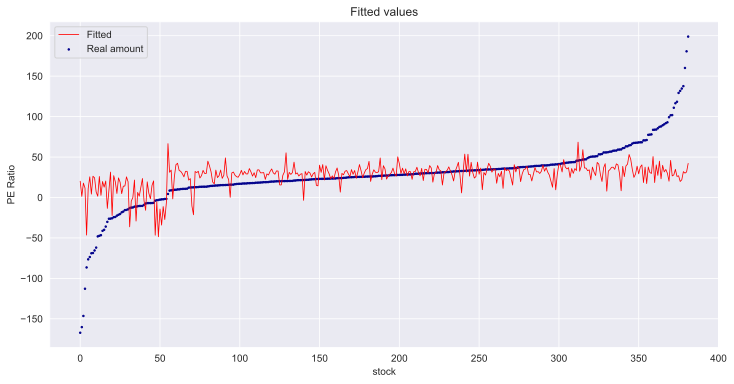

In [82]:
l_train = X.shape[0]
fitted = OLS_reg.fittedvalues * float(std_dic['PE_TTM']) + float(mean_dic['PE_TTM'])
y_true_train = y * float(std_dic['PE_TTM']) + float(mean_dic['PE_TTM'])
plt.scatter(np.arange(l_train), y_true_train, 
            marker = '.', label = 'Real amount',s = 10, c = 'darkblue')
plt.plot(np.arange(l_train),fitted , lw = 0.8,
         c = 'red',label = 'Fitted')
plt.xlabel('stock');plt.ylabel('PE Ratio');plt.legend(loc = 'best')
plt.title('Fitted values');

In [83]:
MSE(fitted, y_true_train)

1205.4069255549964